# BACKGROUND OF PROBLEM

Synchronous motors (SMs) are AC motors with constant speed.A SM dataset is obtained from a real experimental set. The task is to create the strong models to estimate the excitation current of SM

Five parameters are used to represent and model the SM a: the load current ( Iy), power factor (pf), power factor error (e), variation in excitation current ( dif ), and excitation current (If ).< If > is the output and < Iy , pf, e, dif > are the input parameters of the SM in the power factor correction task.

 The linear form can be represented as Elinear = w1∗ x1+w2∗x2+w3∗x3+w4∗x4+w5 and transformed  as 
 
 Elinear(SM) = If predicted = w1∗ Iy+w2∗PF+w3∗e+w4∗dIf+w

A SM dataset is obtained from a real experimental set. This dataset was further splitted to a test size of 30% and training of set of 70% for the training process randomly . The task is to create the best linear or quadratic form to estimate the excitation current of SM. The estimated excitation current is compared with the real value in the test dataset of SM. Three different regressors model was used for the machine learning process and a comparative study of the r2 score was carried out to determine the best model that could be used to estimate the EC. The accuracy of the developed method is tested using the linear SM form swiftly and simply. This feature proves the measurability, testability, and verifiability of the developed method. The excitation currents can be estimated for each sample in the set of test data using the design ratios in the set of test data (parameter rates related to each test sample)

# IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline

In [2]:
df = pd.read_csv('synchronous machine (3).csv',  sep = ';')
df #the data set

,Iy,PF,e,dIf,If
0,3,"0,66","0,34","0,383","1,563"
1,3,"0,68","0,32","0,372","1,552"
2,3,"0,7","0,3","0,36","1,54"
3,3,"0,72","0,28","0,338","1,518"
4,3,"0,74","0,26","0,317","1,497"
...,...,...,...,...,...
552,6,"0,91","0,09","0,142","1,322"
553,6,"0,93","0,07","0,151","1,331"
554,6,"0,95","0,05","0,16","1,34"
555,6,"0,97","0,03","0,16","1,34"


# DATA CLEANING

In [3]:
df.rename(
    columns=({ 'If,,,,': 'If'}), 
    inplace=True,
)   #Renaming the columns

In [4]:
df.head(10)

,Iy,PF,e,dIf,If
0,3,"0,66","0,34","0,383","1,563"
1,3,"0,68","0,32","0,372","1,552"
2,3,"0,7","0,3","0,36","1,54"
3,3,"0,72","0,28","0,338","1,518"
4,3,"0,74","0,26","0,317","1,497"
5,3,"0,76","0,24","0,301","1,481"
6,3,"0,78","0,22","0,29","1,47"
7,3,"0,8","0,2","0,28","1,46"
8,3,"0,82","0,18","0,25","1,43"
9,3,"0,84","0,16","0,221","1,401"


Iy = load current PF = Power factor e = power factor error dIf = changing of Excitation current of Synchronous motors (SMs) If = Excitation current of SM

In [5]:
df = df.replace(',', '.' , regex=True)
df.head(5) #correcting the decimal point error on dataset

,Iy,PF,e,dIf,If
0,3,0.66,0.34,0.383,1.563
1,3,0.68,0.32,0.372,1.552
2,3,0.7,0.3,0.36,1.54
3,3,0.72,0.28,0.338,1.518
4,3,0.74,0.26,0.317,1.497


In [6]:
df.dtypes.unique() #seeing the data types

array([dtype('O')], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Iy      557 non-null    object
 1   PF      557 non-null    object
 2   e       557 non-null    object
 3   dIf     557 non-null    object
 4   If      557 non-null    object
dtypes: object(5)
memory usage: 21.9+ KB


In [8]:
df = df.apply(pd.to_numeric, errors='coerce') #changing the data type to numerical

In [9]:
df.dtypes.unique()

array([dtype('float64')], dtype=object)

In [10]:
df.describe()

,Iy,PF,e,dIf,If
count,557.000000,557.000000,557.000000,557.000000,557.000000
mean,4.499820,0.825296,0.174704,0.350659,1.530659
std,0.896024,0.103925,0.103925,0.180566,0.180566
min,3.000000,0.650000,0.000000,0.037000,1.217000
25%,3.700000,0.740000,0.080000,0.189000,1.369000
50%,4.500000,0.820000,0.180000,0.345000,1.525000
75%,5.300000,0.920000,0.260000,0.486000,1.666000
max,6.000000,1.000000,0.350000,0.769000,1.949000


checking the shape of the dataset

In [11]:
df.shape

(557, 5)

checking for NaN

In [12]:
null = df.isnull().sum()
null

Iy     0
PF     0
e      0
dIf    0
If     0
dtype: int64

There is no NaN values

In [13]:
df

,Iy,PF,e,dIf,If
0,3.0,0.66,0.34,0.383,1.563
1,3.0,0.68,0.32,0.372,1.552
2,3.0,0.70,0.30,0.360,1.540
3,3.0,0.72,0.28,0.338,1.518
4,3.0,0.74,0.26,0.317,1.497
...,...,...,...,...,...
552,6.0,0.91,0.09,0.142,1.322
553,6.0,0.93,0.07,0.151,1.331
554,6.0,0.95,0.05,0.160,1.340
555,6.0,0.97,0.03,0.160,1.340


In [14]:
# Now lets check for NaN 
df.isnull().sum()

Iy     0
PF     0
e      0
dIf    0
If     0
dtype: int64

No more NaN values in our data set

In [15]:
# lets now describe the cleaned dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Iy,557.0,4.499820,0.896024,3.000,3.700,4.500,5.300,6.000
PF,557.0,0.825296,0.103925,0.650,0.740,0.820,0.920,1.000
e,557.0,0.174704,0.103925,0.000,0.080,0.180,0.260,0.350
dIf,557.0,0.350659,0.180566,0.037,0.189,0.345,0.486,0.769
If,557.0,1.530659,0.180566,1.217,1.369,1.525,1.666,1.949


# EXPLORATORY DATA ANALYSIS

# univariate analysis

Iy = load current

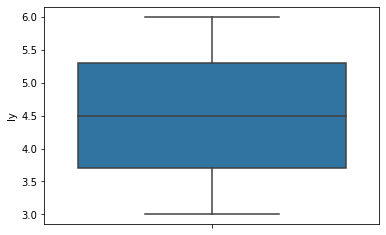

In [16]:
sns.boxplot(y = 'Iy', data = df)
plt.show()

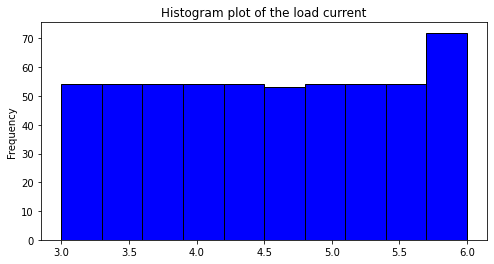

In [17]:
df['Iy'].plot.hist(edgecolor = 'black', color = 'blue', grid = False, figsize = (8, 4) )
plt.title('Histogram plot of the load current')
plt.show()

the mean load current is 4.4998. the minimum and maximum load current is 3.00 and 6.00 of the SM

PF = Power factor

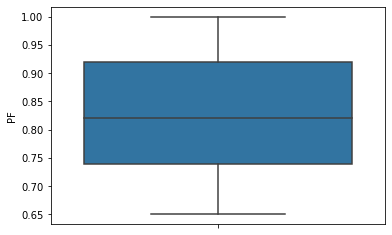

In [18]:
sns.boxplot(y = 'PF', data = df)
plt.show()

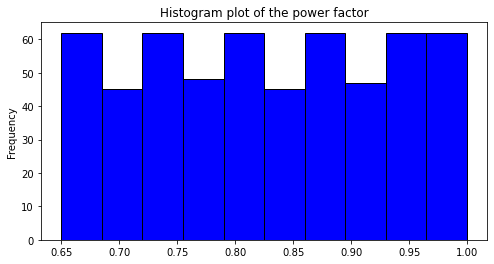

In [19]:
df['PF'].plot.hist(edgecolor = 'black', color = 'blue', grid = False, figsize = (8, 4) )
plt.title('Histogram plot of the power factor')
plt.show()

the mean power factor is 0.825. the minimum and maximum power factor is 0.650 and 1.00 of the SM

e = power factor error

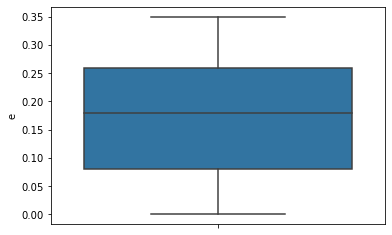

In [20]:
sns.boxplot(y = 'e', data = df)
plt.show()

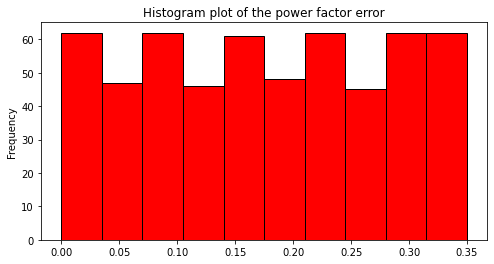

In [21]:
df['e'].plot.hist(edgecolor = 'black', color = 'red', grid = False, figsize = (8, 4) )
plt.title('Histogram plot of the power factor error')
plt.show()

 the minimum and maximum power factor error o and 0.350 of the SM

dIf = changing of Excitation Current (EC) of SM

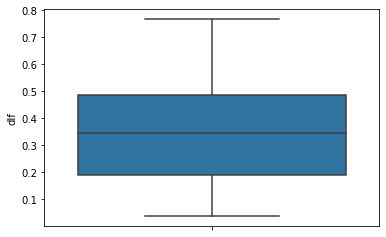

In [22]:
sns.boxplot(y = 'dIf', data = df)
plt.show()

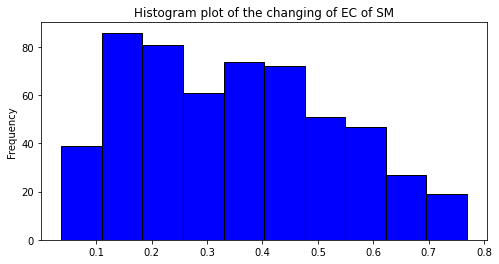

In [23]:
df['dIf'].plot.hist(edgecolor = 'black', color = 'blue', grid = False, figsize = (8, 4) )
plt.title('Histogram plot of the changing of EC of SM')
plt.show()

the mean changing EC is 0.3507. the minimum and maximum changing EC is 0.037 and 0.769 of the SM

If = Ec of SM

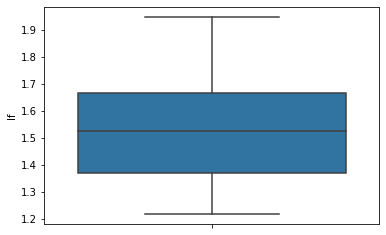

In [24]:
sns.boxplot(y = 'If', data = df)
plt.show()

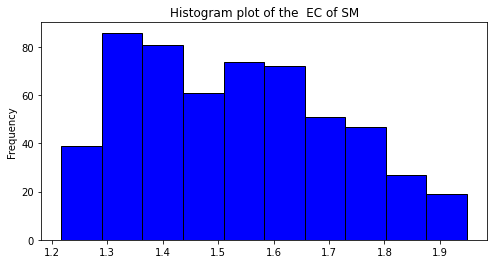

In [25]:
df['If'].plot.hist(edgecolor = 'black', color = 'blue', grid = False, figsize = (8, 4) )
plt.title('Histogram plot of the  EC of SM')
plt.show()

The EC has a mean value 0f 1.5306 with a median value of 1.525. the minimum and maximum value of 1.217 and 1.949 respectively. 

# BIVARIATE ANALYSIS

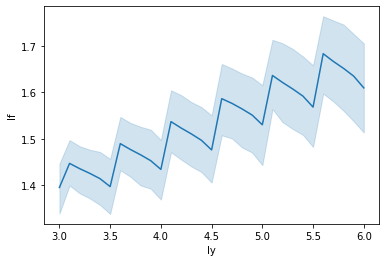

In [26]:
sns.lineplot( x = 'Iy', y = 'If', data = df)
plt.show()

A sinusoidal reelationship exist between the EC and the load current which is directly proportional. 

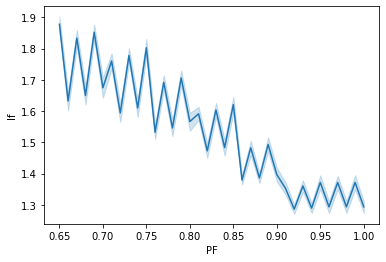

In [27]:
sns.lineplot( x = 'PF', y = 'If', data = df)
plt.show()

A sinusoidal reelationship exist between the EC and the power factor which increases as the EC decreases.

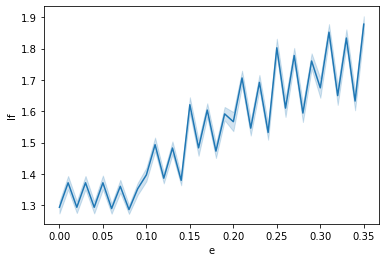

In [28]:
sns.lineplot( x = 'e', y = 'If', data = df)
plt.show()

As the EC increases, the power factor error increases. Results from the experiment shows a proportionality relationship between the power factor and the EC

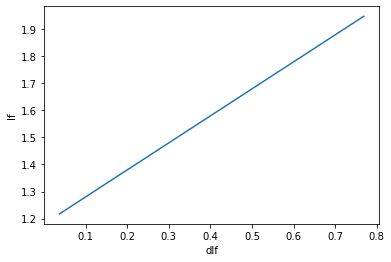

In [29]:
sns.lineplot( x = 'dIf', y = 'If', data = df)
plt.show()

A linear relationship exist between the changing EC and the EC of SM

# MULTIVARIATE ANALYSIS

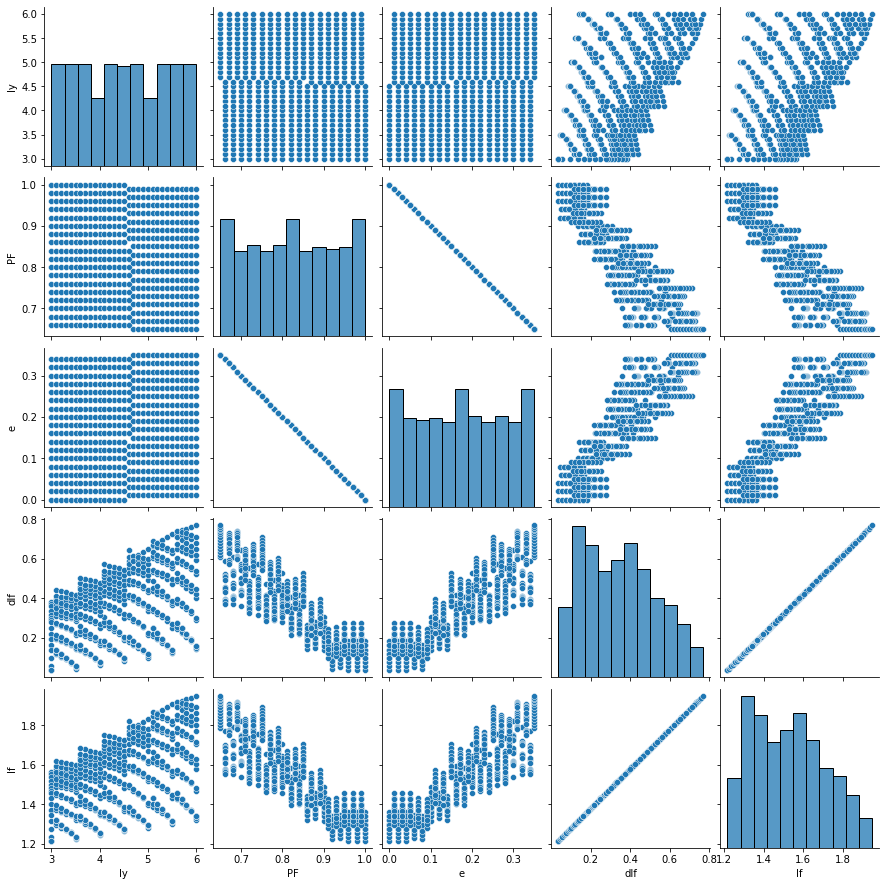

In [30]:
sns.pairplot(df)

In [31]:
df.corr()

,Iy,PF,e,dIf,If
Iy,1.000000,-0.041574,0.041574,0.424945,0.424945
PF,-0.041574,1.000000,-1.000000,-0.861013,-0.861013
e,0.041574,-1.000000,1.000000,0.861013,0.861013
dIf,0.424945,-0.861013,0.861013,1.000000,1.000000
If,0.424945,-0.861013,0.861013,1.000000,1.000000


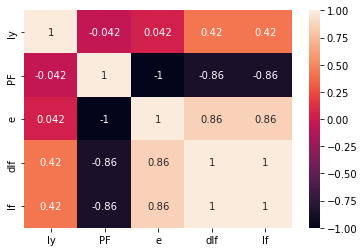

In [32]:
sns.heatmap(df.corr(), annot = True)
plt.show()

the heatmap shows the correlation of the parameters of the data set

# MODELLING

In [33]:
# lets call the data set
df.head(5)

,Iy,PF,e,dIf,If
0,3.0,0.66,0.34,0.383,1.563
1,3.0,0.68,0.32,0.372,1.552
2,3.0,0.70,0.30,0.360,1.540
3,3.0,0.72,0.28,0.338,1.518
4,3.0,0.74,0.26,0.317,1.497


# DATA PREPROCESSING

OUTLIERS TREATMENT

No outlier detected nor treated in this study

In [34]:
# getting target
y = df['If']

In [35]:
x = df.drop(columns = ['If'])
x.head()

,Iy,PF,e,dIf
0,3.0,0.66,0.34,0.383
1,3.0,0.68,0.32,0.372
2,3.0,0.70,0.30,0.360
3,3.0,0.72,0.28,0.338
4,3.0,0.74,0.26,0.317


In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()
X = scaler.fit_transform(x)
X

array([[-1.67536583, -1.59195683,  1.59195683,  0.17927073],
       [-1.67536583, -1.39933818,  1.39933818,  0.11829639],
       [-1.67536583, -1.20671953,  1.20671953,  0.05177893],
       ...,
       [ 1.67576692,  1.20101359, -1.20101359, -1.05684546],
       [ 1.67576692,  1.39363224, -1.39363224, -1.05684546],
       [ 1.67576692,  1.58625089, -1.58625089, -1.05684546]])

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, train_size = 0.70, random_state = 100)

In [40]:
x_train

,Iy,PF,e,dIf
287,4.5,1.00,0.00,0.096
482,5.6,0.95,0.05,0.277
442,5.4,0.87,0.13,0.286
221,4.3,0.98,0.02,0.140
321,4.7,0.97,0.03,0.185
...,...,...,...,...
526,5.9,0.75,0.25,0.666
53,3.2,1.00,0.00,0.118
350,4.9,0.83,0.17,0.373
79,3.4,0.80,0.20,0.317


# BASELINE

In [41]:
y_train

287    1.276
482    1.457
442    1.466
221    1.320
321    1.365
       ...  
526    1.846
53     1.298
350    1.553
79     1.497
520    1.398
Name: If, Length: 389, dtype: float64

In [42]:
# Lets take the mean of y_train
y_mean = y_train.mean()

In [43]:
y_baseline_predict = [y_mean] * len(y_train)
y_baseline_predict

[1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097686369,
 1.5256658097

In [44]:
from sklearn.metrics import mean_absolute_error, r2_score

In [45]:
mean_absolute_error(y_train, y_baseline_predict)

0.1542801858301227

# LINEAR REGRESSION

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
model = LinearRegression()

In [48]:
model.fit(x_train, y_train)

LinearRegression()

In [49]:
model.coef_

array([ 1.03671970e-16, -1.11022302e-16,  3.88578059e-16,  1.00000000e+00])

In [50]:
model.intercept_

1.1800000000000004

In [51]:
prediction = model.predict(x_test)

In [52]:
prediction

array([1.65 , 1.481, 1.236, 1.811, 1.61 , 1.646, 1.314, 1.318, 1.322,
       1.298, 1.296, 1.458, 1.486, 1.47 , 1.637, 1.225, 1.365, 1.527,
       1.565, 1.394, 1.598, 1.525, 1.721, 1.859, 1.599, 1.679, 1.575,
       1.256, 1.705, 1.557, 1.301, 1.37 , 1.518, 1.408, 1.529, 1.236,
       1.603, 1.569, 1.881, 1.495, 1.32 , 1.217, 1.877, 1.557, 1.773,
       1.497, 1.429, 1.441, 1.486, 1.337, 1.345, 1.753, 1.369, 1.755,
       1.396, 1.252, 1.598, 1.32 , 1.45 , 1.38 , 1.48 , 1.821, 1.34 ,
       1.38 , 1.809, 1.32 , 1.711, 1.633, 1.317, 1.661, 1.433, 1.707,
       1.949, 1.832, 1.9  , 1.518, 1.61 , 1.555, 1.45 , 1.506, 1.61 ,
       1.667, 1.617, 1.67 , 1.622, 1.318, 1.607, 1.372, 1.32 , 1.589,
       1.47 , 1.342, 1.549, 1.773, 1.916, 1.574, 1.831, 1.652, 1.398,
       1.699, 1.77 , 1.298, 1.342, 1.575, 1.817, 1.788, 1.232, 1.387,
       1.687, 1.479, 1.32 , 1.552, 1.716, 1.468, 1.32 , 1.628, 1.43 ,
       1.534, 1.278, 1.924, 1.31 , 1.552, 1.296, 1.587, 1.382, 1.909,
       1.565, 1.486,

# EVALUATION

In [53]:
from numpy import math
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [54]:
mean_squared_error(y_test, prediction)

2.494537832730134e-31

In [55]:
math.sqrt(mean_squared_error(y_test, prediction))

4.994534845939243e-16

In [56]:
score = r2_score(y_test, prediction)
score

1.0

An accuracy score of 100%  and an excellent model to estimate the EC of SM. 

In [57]:
mean_absolute_error(y_test, prediction)

4.758098676964956e-16

# RANDOM FOREST REGRESSOR

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
model = RandomForestRegressor(n_estimators = 30, random_state = 100, max_depth = 5)

In [60]:
rf = model.fit(x_train, y_train)

In [61]:
y_pred = rf.predict(x_test)
y_pred

array([1.64965267, 1.47966908, 1.23914552, 1.8166824 , 1.60455203,
       1.64751069, 1.31258167, 1.32081602, 1.32081602, 1.2981894 ,
       1.2981894 , 1.45716791, 1.48922345, 1.46779557, 1.63409121,
       1.23705274, 1.3656469 , 1.52831272, 1.56510253, 1.39865602,
       1.59814298, 1.52677528, 1.7176489 , 1.85671611, 1.59814298,
       1.67729293, 1.57785402, 1.2558195 , 1.70662698, 1.55840184,
       1.2981894 , 1.36796932, 1.51620799, 1.40692779, 1.53010679,
       1.23914552, 1.60301965, 1.57007017, 1.88766361, 1.49694562,
       1.32081602, 1.23187422, 1.87769287, 1.55840184, 1.76851089,
       1.49694562, 1.43036333, 1.43693072, 1.48922345, 1.34291889,
       1.34291889, 1.75409258, 1.36796932, 1.75409258, 1.3993706 ,
       1.2558195 , 1.59814298, 1.32081602, 1.451763  , 1.37846753,
       1.47966908, 1.83042128, 1.34291889, 1.37846753, 1.79448038,
       1.32081602, 1.71232417, 1.63323277, 1.32081602, 1.65765643,
       1.43129309, 1.70662698, 1.91578033, 1.83134014, 1.89787

# EVALUATION

In [62]:
r2_score(y_test, y_pred)

0.9993223086025839

An accurracy score of 99.89% signifys the model perform very good to estimate the EC of SM

In [63]:
mean_squared_error(y_test, y_pred)

2.232877322177821e-05

In [64]:
math.sqrt(mean_squared_error(y_test, y_pred))

0.004725333133418025

In [65]:
mean_absolute_error(y_test, y_pred)

0.0026589500536666516

# XGB REGRESSOR

In [66]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 100)

In [68]:
xgbr = XGBRegressor(verbosity = 0)
xgbr

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)

In [69]:
xgbr.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [70]:
score = xgbr.score(x_train, y_train)

In [71]:
score

0.9999548968720183

In [72]:
cv_score = cross_val_score(xgbr, x_train, y_train, cv = 10)
cv_score

array([0.99969208, 0.99966205, 0.99977187, 0.99959166, 0.99962148,
       0.99972853, 0.99980425, 0.99975891, 0.9997318 , 0.99975727])

In [73]:
cv_score.mean()

0.999711990799125

In [74]:
y_predict = xgbr.predict(x_test)

In [75]:
y_predict

array([1.6533113, 1.4783354, 1.2370112, 1.8234575, 1.6080745, 1.6460133,
       1.3156948, 1.3173147, 1.319616 , 1.2985541, 1.2954214, 1.4572343,
       1.4879242, 1.4660558, 1.6370368, 1.2170485, 1.3638386, 1.5297849,
       1.5621567, 1.3929403, 1.5979785, 1.5196906, 1.7176064, 1.8597894,
       1.5975637, 1.6767786, 1.575055 , 1.2563175, 1.7080823, 1.5569048,
       1.2949023, 1.3672208, 1.5181122, 1.4086356, 1.5301875, 1.2370112,
       1.6033423, 1.5721034, 1.8786106, 1.4968332, 1.3200352, 1.2171284,
       1.8754025, 1.5567173, 1.7751305, 1.4970319, 1.4317648, 1.4371277,
       1.4870987, 1.3398358, 1.3432355, 1.7542949, 1.36852  , 1.7550722,
       1.3942965, 1.2546707, 1.5979785, 1.3200352, 1.4531814, 1.3811178,
       1.4780422, 1.826135 , 1.3403687, 1.3817499, 1.8009487, 1.3200352,
       1.7091628, 1.6286683, 1.3200835, 1.6584321, 1.4330634, 1.7078038,
       1.9392769, 1.8298498, 1.9032762, 1.5174253, 1.6094645, 1.5550587,
       1.4531226, 1.5077217, 1.6092752, 1.6653918, 

# EVALUATION

In [76]:
mean_squared_error(y_test, y_predict)

8.79210361731729e-06

In [77]:
math.sqrt(mean_squared_error(y_test, y_predict))

0.00296514816110718

In [78]:
mean_absolute_error(y_test, y_predict)

0.0020149629626955395

In [79]:
r2_score(y_test, y_predict)

0.9997417586353494

An accurracy score of 99.97% tells us that the model perform excellently well and its a good model to estimate the EC of SM

# COMPARISON OF THE TEST AND PREDICTED EC

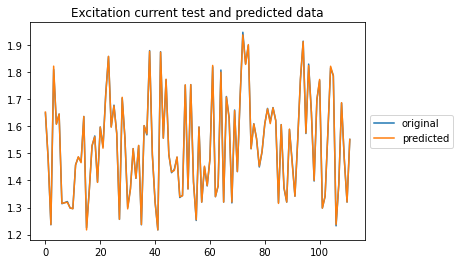

In [80]:
x_axis = range(len(y_test))
plt.plot(x_axis, y_test, label = 'original')
plt.plot(x_axis, y_predict, label = 'predicted')
plt.title( 'Excitation current test and predicted data')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5) )
plt.show()

# RECOMMENDATION

More datas should be gather at real time experiment to further and better understand the behaviour of EC of SM

# RELEVANT PAPERS

1) Kahraman, H. T. (2014). Metaheuristic linear modeling technique for estimating the excitation current of a synchronous motor.Â Turkish Journal of Electrical Engineering & Computer Sciences,Â 22(6), 1637-1652.

2) Kahraman, H. T., Bayindir, R, & Sagiroglu, S. (2012). A new approach to predict the excitation current and parameter weightings of synchronous machines based on genetic algorithm-based k-NN estimator.Â Energy Conversion and Management,Â 64, 129-138.

